# CREDIT CARD APPROVAL PROJECT

## Jiaqi Fan, Balaram Pothamsetty, Swapnil Sakorkar, Azhagapan Chitha

Inro:
Banking industries received so many applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval that can be great. In this project, we have tried to find out the factors that are most important for getting an approval for the credit card through the power of Data Analysis and Machine Learning. We have achieved 86% of accuracy using random forest Alorigthm

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

# Data Preparation
Preprocessing of the data includes data cleaning, data integration, data transformation , data reduction, missing values imputation among other tasks

As you can see that the above column header are in dat format.So renaming the Columns for better understanding

In [2]:
#Import the data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', sep=',', header=None)
#df.head()

#Renaming the columns
df = df.rename(columns= {0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8:'NoPriorDefault',9: 'Employed',
                       10: 'CreditScore',11: 'DriversLicense',12: 'Citizen',13: 'ZipCode',14: 'Income',15: 'Declined'})
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,NoPriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Declined
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# Replace "?" with NaN
df.replace('?', np.NaN, inplace = True)

# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"])

# Imputing missing values for numerical columns with mean value
df.fillna(df.mean(), inplace=True)


def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])

imputeWithMode(df)

df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
NoPriorDefault    0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Declined          0
dtype: int64

In [4]:
df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [5]:
# Import the module we write for this project
import Capstone_Module_Group_7

In [6]:
# use function in Capstone_Module_Group_7 to encode catagroy variables
df = Capstone_Module_Group_7.labelTrans(df)
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,NoPriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Declined
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


# Exploratory Data Analysis

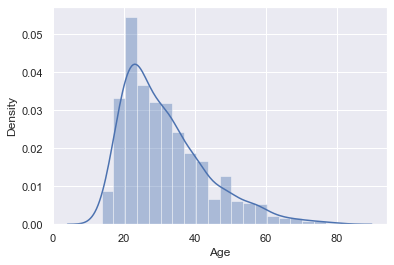

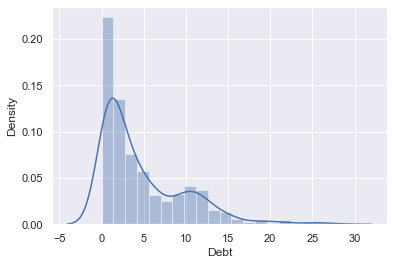

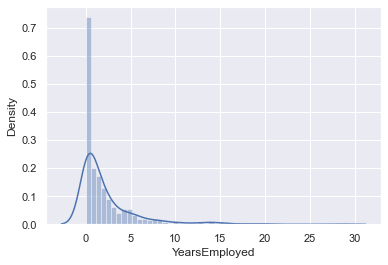

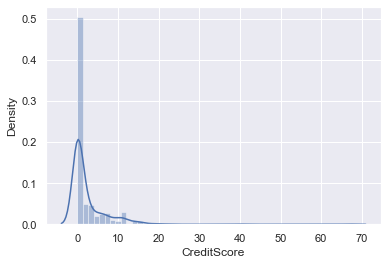

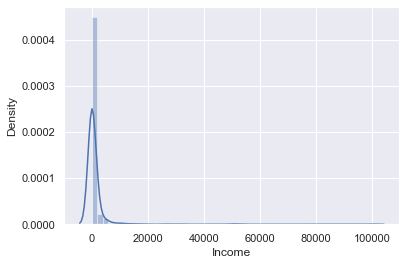

In [7]:
# use function in Capstone_Module_Group_7 to plot
Capstone_Module_Group_7.plotDistPlot(df['Age'])
Capstone_Module_Group_7.plotDistPlot(df['Debt'])
Capstone_Module_Group_7.plotDistPlot(df['YearsEmployed'])
Capstone_Module_Group_7.plotDistPlot(df['CreditScore'])
Capstone_Module_Group_7.plotDistPlot(df['Income'])

<AxesSubplot:>

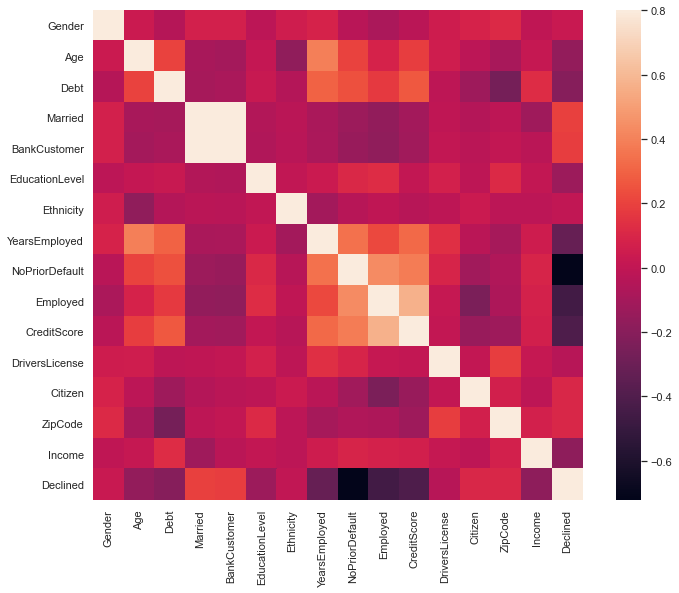

In [8]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

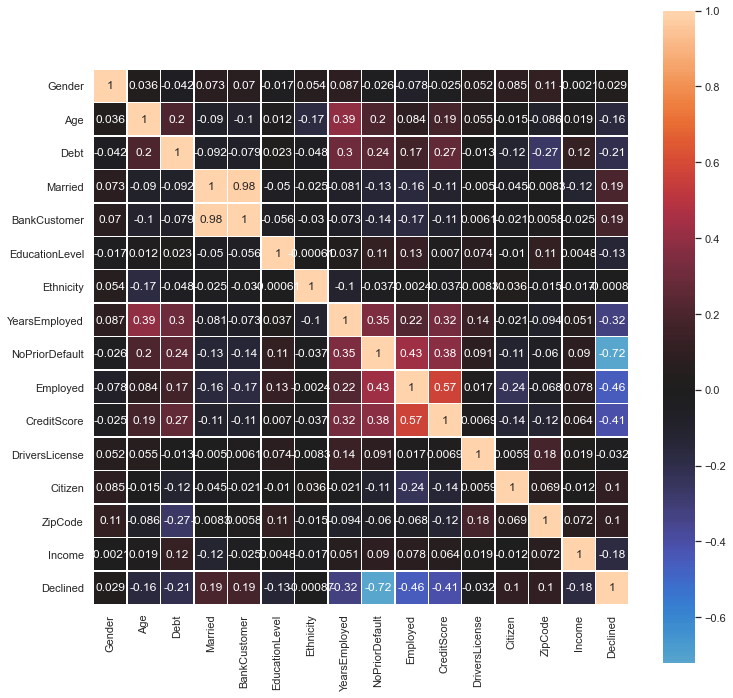

In [9]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, center=0, square=True, linewidths=.5, annot=True)

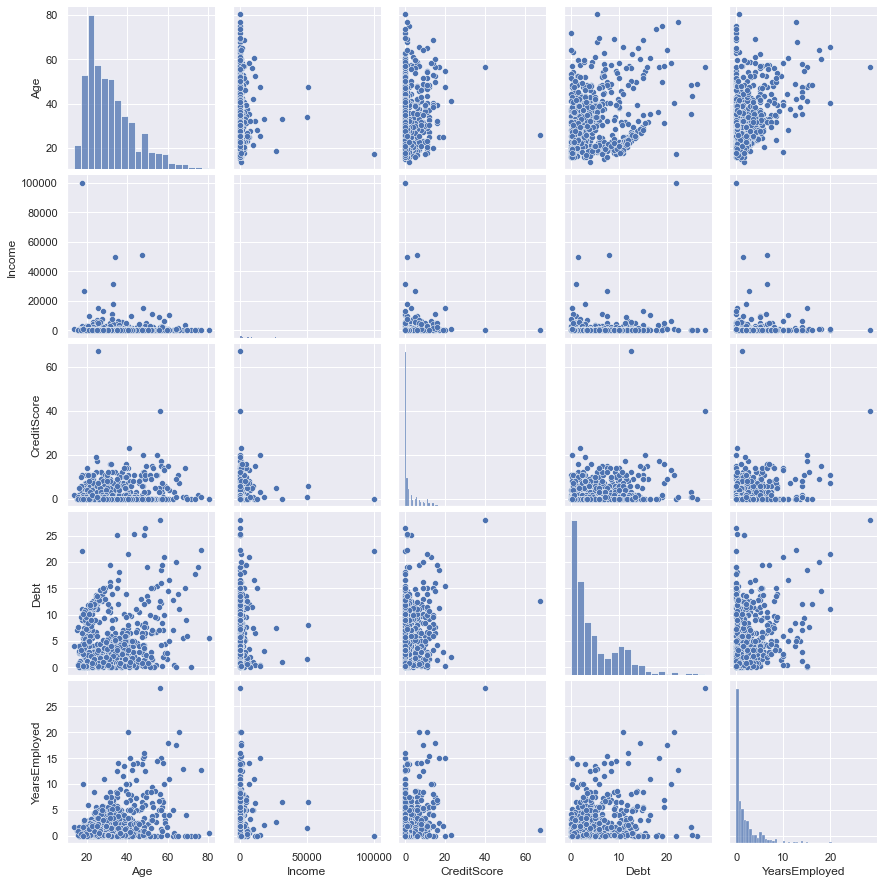

In [10]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(df[cols], size = 2.5)
plt.show()

<AxesSubplot:xlabel='Declined', ylabel='count'>

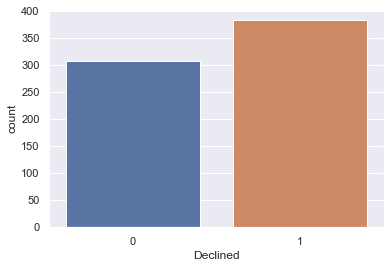

In [11]:
sns.countplot(data = df, x = 'Declined')

Text(0.5, 1.0, 'Declined vs Age')

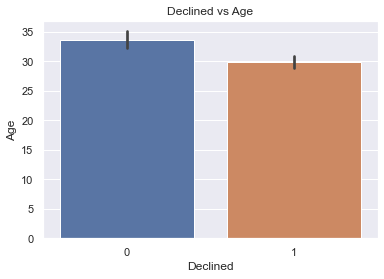

In [12]:
ax=sns.barplot(x='Declined',y='Age',data=df)
#ax.set_ylim([0,80])
plt.title('Declined vs Age')

Text(0.5, 1.0, 'Declined vs CreditScore')

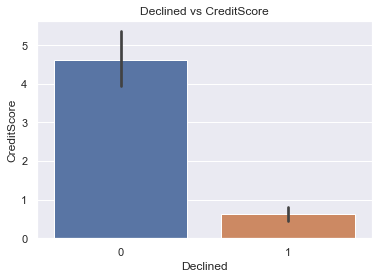

In [13]:
ax=sns.barplot(x='Declined',y='CreditScore',data=df)
#ax.set_ylim([0,10])
plt.title('Declined vs CreditScore')

<AxesSubplot:xlabel='NoPriorDefault', ylabel='Declined'>

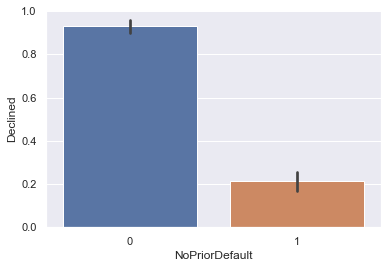

In [14]:
sns.barplot(x='NoPriorDefault',y='Declined',data=df)

<AxesSubplot:xlabel='EducationLevel', ylabel='Declined'>

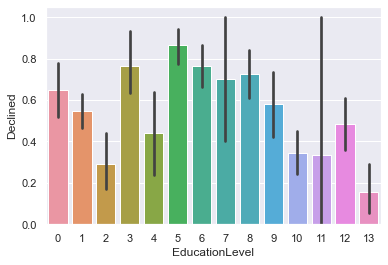

In [15]:
sns.barplot(x='EducationLevel',y='Declined',data=df)

# Supervised Learning

In [16]:
# split the data into train and test sets

X = df.drop(['DriversLicense', 'ZipCode', 'Declined'], axis=1)
y = df['Declined']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

In [17]:
# Feature Scaling

featureScale = StandardScaler()
X_train = featureScale.fit_transform(X_train)
X_test = featureScale.transform(X_test)

## Decision Tree

In [18]:
# Decision Tree Model

decisionTreeModel = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=2, min_samples_leaf=2)
decisionTreeModel = decisionTreeModel.fit(X_train,y_train)

y_pred_decisionTree=decisionTreeModel.predict(X_test)


# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_decisionTree))
print(metrics.confusion_matrix(y_test,y_pred_decisionTree)) 
print(metrics.classification_report(y_test, y_pred_decisionTree))

Accuracy: 0.8188405797101449
[[43  9]
 [16 70]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        52
           1       0.89      0.81      0.85        86

    accuracy                           0.82       138
   macro avg       0.81      0.82      0.81       138
weighted avg       0.83      0.82      0.82       138



Text(0.5, 1.0, 'DT Confusion Matrix')

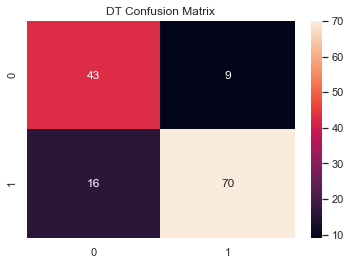

In [19]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_decisionTree), annot=True)
plt.title('DT Confusion Matrix')

## Random Forest

In [20]:
# Random Forest Model

randomForestModel = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, \
                            min_samples_split=2, n_jobs=1, random_state=2020)

randomForestModel = randomForestModel.fit(X_train,y_train)

y_pred_randomForest = randomForestModel.predict(X_test)


# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_randomForest))
print(metrics.confusion_matrix(y_test, y_pred_randomForest)) 
print(metrics.classification_report(y_test, y_pred_randomForest))

Accuracy: 0.8623188405797102
[[43  9]
 [10 76]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        52
           1       0.89      0.88      0.89        86

    accuracy                           0.86       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138



Text(0.5, 1.0, 'RF Confusion Matrix')

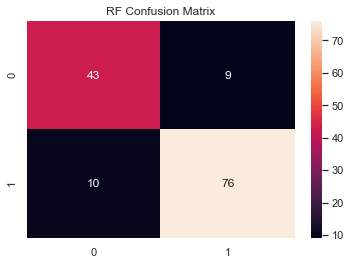

In [21]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_randomForest), annot=True)
plt.title('RF Confusion Matrix')

Feature ranking:
1. feature 8 (0.332755)
2. feature 10 (0.120008)
3. feature 7 (0.119912)
4. feature 12 (0.089385)
5. feature 2 (0.084706)
6. feature 1 (0.073475)
7. feature 9 (0.052798)
8. feature 5 (0.050929)
9. feature 6 (0.028818)
10. feature 11 (0.012869)
11. feature 3 (0.012509)
12. feature 4 (0.012373)
13. feature 0 (0.009461)


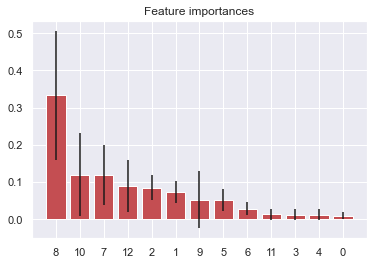

In [22]:
importances = randomForestModel.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForestModel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

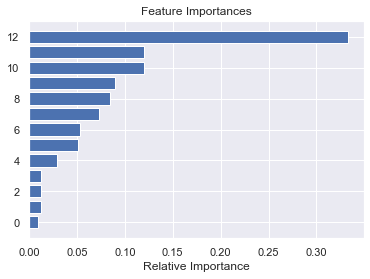

In [23]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

## Support Vector Machine (with linear kernal)

In [24]:
#Create a svm Classifier with linear kernal
supportVectorMachineModel_linear = svm.SVC(kernel='linear') # Linear Kernel

supportVectorMachineModel_linear = supportVectorMachineModel_linear.fit(X_train, y_train)

y_pred_svm_linear = supportVectorMachineModel_linear.predict(X_test)


# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_linear))
print(metrics.confusion_matrix(y_test, y_pred_svm_linear)) 
print(metrics.classification_report(y_test, y_pred_svm_linear))

Accuracy: 0.8405797101449275
[[48  4]
 [18 68]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        52
           1       0.94      0.79      0.86        86

    accuracy                           0.84       138
   macro avg       0.84      0.86      0.84       138
weighted avg       0.86      0.84      0.84       138



Text(0.5, 1.0, 'SVM Linear Confusion Matrix')

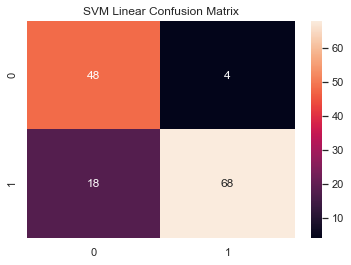

In [25]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_svm_linear), annot=True)
plt.title('SVM Linear Confusion Matrix')

## Support Vector Machine (with RBF kernal)

In [26]:
#Create a svm Classifier with RBF kernal

supportVectorMachineModel_rbf = svm.SVC(kernel='rbf', gamma="scale")

supportVectorMachineModel_rbf = supportVectorMachineModel_rbf.fit(X_train, y_train)

y_pred_svm_rbf = supportVectorMachineModel_rbf.predict(X_test)


# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_svm_rbf))
print(metrics.confusion_matrix(y_test,y_pred_svm_rbf))
print(metrics.classification_report(y_test,y_pred_svm_rbf))

Accuracy: 0.8405797101449275
[[45  7]
 [15 71]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        52
           1       0.91      0.83      0.87        86

    accuracy                           0.84       138
   macro avg       0.83      0.85      0.83       138
weighted avg       0.85      0.84      0.84       138



Text(0.5, 1.0, 'SVM rbf Confusion Matrix')

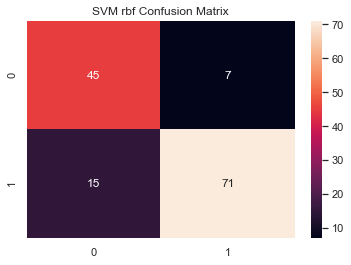

In [27]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_svm_rbf), annot=True)
plt.title('SVM rbf Confusion Matrix')

## K Nearest Neighbors

In [28]:
# run KNN for different values of K

for k in range(1,41):
    knnModel = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knnModel.fit(X_train, y_train)

    # check accuracy of our model on the test data
    print("K =", k, ", Accuracy =", knnModel.score(X_test, y_test))

K = 1 , Accuracy = 0.8115942028985508
K = 2 , Accuracy = 0.8115942028985508
K = 3 , Accuracy = 0.7971014492753623
K = 4 , Accuracy = 0.8115942028985508
K = 5 , Accuracy = 0.8405797101449275
K = 6 , Accuracy = 0.8405797101449275
K = 7 , Accuracy = 0.855072463768116
K = 8 , Accuracy = 0.8478260869565217
K = 9 , Accuracy = 0.855072463768116
K = 10 , Accuracy = 0.855072463768116
K = 11 , Accuracy = 0.8623188405797102
K = 12 , Accuracy = 0.8478260869565217
K = 13 , Accuracy = 0.855072463768116
K = 14 , Accuracy = 0.8478260869565217
K = 15 , Accuracy = 0.8478260869565217
K = 16 , Accuracy = 0.8695652173913043
K = 17 , Accuracy = 0.8623188405797102
K = 18 , Accuracy = 0.8623188405797102
K = 19 , Accuracy = 0.8623188405797102
K = 20 , Accuracy = 0.8623188405797102
K = 21 , Accuracy = 0.8623188405797102
K = 22 , Accuracy = 0.8623188405797102
K = 23 , Accuracy = 0.8623188405797102
K = 24 , Accuracy = 0.8623188405797102
K = 25 , Accuracy = 0.8623188405797102
K = 26 , Accuracy = 0.8623188405797102

In [29]:
# run cross validation, 10-folder

errors = {}
accuracy = {}

for k in range(1,41):
    knnModel_crossV = KNeighborsClassifier(n_neighbors=k, weights="distance")
    
    # train model with cross validation folder of 10 
    cv_scores = cross_val_score(knnModel_crossV, X, y, cv=10)

    # check accuracy of our model on the test data
    print("k =", k, ", CV mean (Accuracy):", np.mean(cv_scores))
    
    # save errror
    errors[k] = 1-np.mean(cv_scores)
    accuracy[k] = np.mean(cv_scores)

k = 1 , CV mean (Accuracy): 0.682608695652174
k = 2 , CV mean (Accuracy): 0.682608695652174
k = 3 , CV mean (Accuracy): 0.6884057971014493
k = 4 , CV mean (Accuracy): 0.7
k = 5 , CV mean (Accuracy): 0.7014492753623189
k = 6 , CV mean (Accuracy): 0.6971014492753623
k = 7 , CV mean (Accuracy): 0.7043478260869567
k = 8 , CV mean (Accuracy): 0.7101449275362319
k = 9 , CV mean (Accuracy): 0.7101449275362319
k = 10 , CV mean (Accuracy): 0.7101449275362319
k = 11 , CV mean (Accuracy): 0.7028985507246377
k = 12 , CV mean (Accuracy): 0.7188405797101449
k = 13 , CV mean (Accuracy): 0.7159420289855072
k = 14 , CV mean (Accuracy): 0.7173913043478259
k = 15 , CV mean (Accuracy): 0.708695652173913
k = 16 , CV mean (Accuracy): 0.7217391304347827
k = 17 , CV mean (Accuracy): 0.7159420289855072
k = 18 , CV mean (Accuracy): 0.7246376811594203
k = 19 , CV mean (Accuracy): 0.7217391304347827
k = 20 , CV mean (Accuracy): 0.7202898550724637
k = 21 , CV mean (Accuracy): 0.7188405797101449
k = 22 , CV mean (A

Text(0.5, 1.0, 'kNN 10-folder Cross Validation')

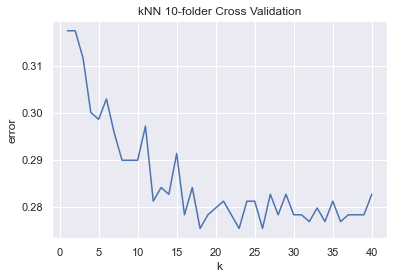

In [30]:
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("k")
plt.ylabel("error")
plt.title('kNN 10-folder Cross Validation')

Text(0.5, 1.0, 'kNN 10-folder Cross Validation')

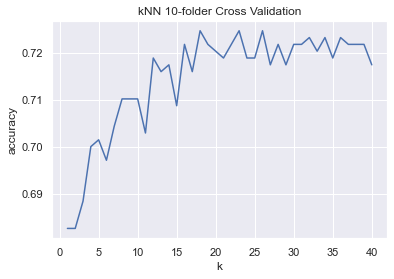

In [31]:
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title('kNN 10-folder Cross Validation')

In [32]:
print("Final accuracy =", accuracy[18])

#  
# We choose k=18 as the nest best candidate that will not lead to overfitting

Final accuracy = 0.7246376811594203


## Naive Bayes

In [33]:
naiveBayesModel = GaussianNB()
naiveBayesModel = naiveBayesModel.fit(X_train,y_train)
y_pred_naiveBayes = naiveBayesModel.predict(X_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_naiveBayes))
print(metrics.confusion_matrix(y_test,y_pred_naiveBayes))
print(metrics.classification_report(y_test,y_pred_naiveBayes))

Accuracy: 0.8043478260869565
[[34 18]
 [ 9 77]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72        52
           1       0.81      0.90      0.85        86

    accuracy                           0.80       138
   macro avg       0.80      0.77      0.78       138
weighted avg       0.80      0.80      0.80       138



Text(0.5, 1.0, 'NB Confusion Matrix')

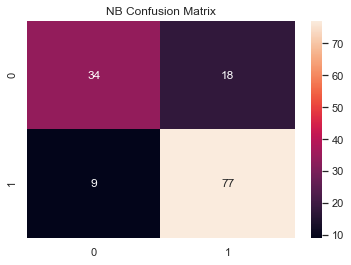

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_naiveBayes), annot=True)
plt.title('NB Confusion Matrix')

## Conclusion

RF model is the best perfomance model.